# **TWITTER CLIMATE CHANGE SENTIMENT ANALYSIS**



PROJECT TEAM MEMBERS
1. Eric Cheruiyot
2. Geoffery Ongeri
3. Antonia Mulinge

# **Table of contents**


*   Introduction
*   Understanding the dataset
*   Exploratory Data Analysis
*   Cleaning and visualising Tweet Data


# **INTRODUCTION**

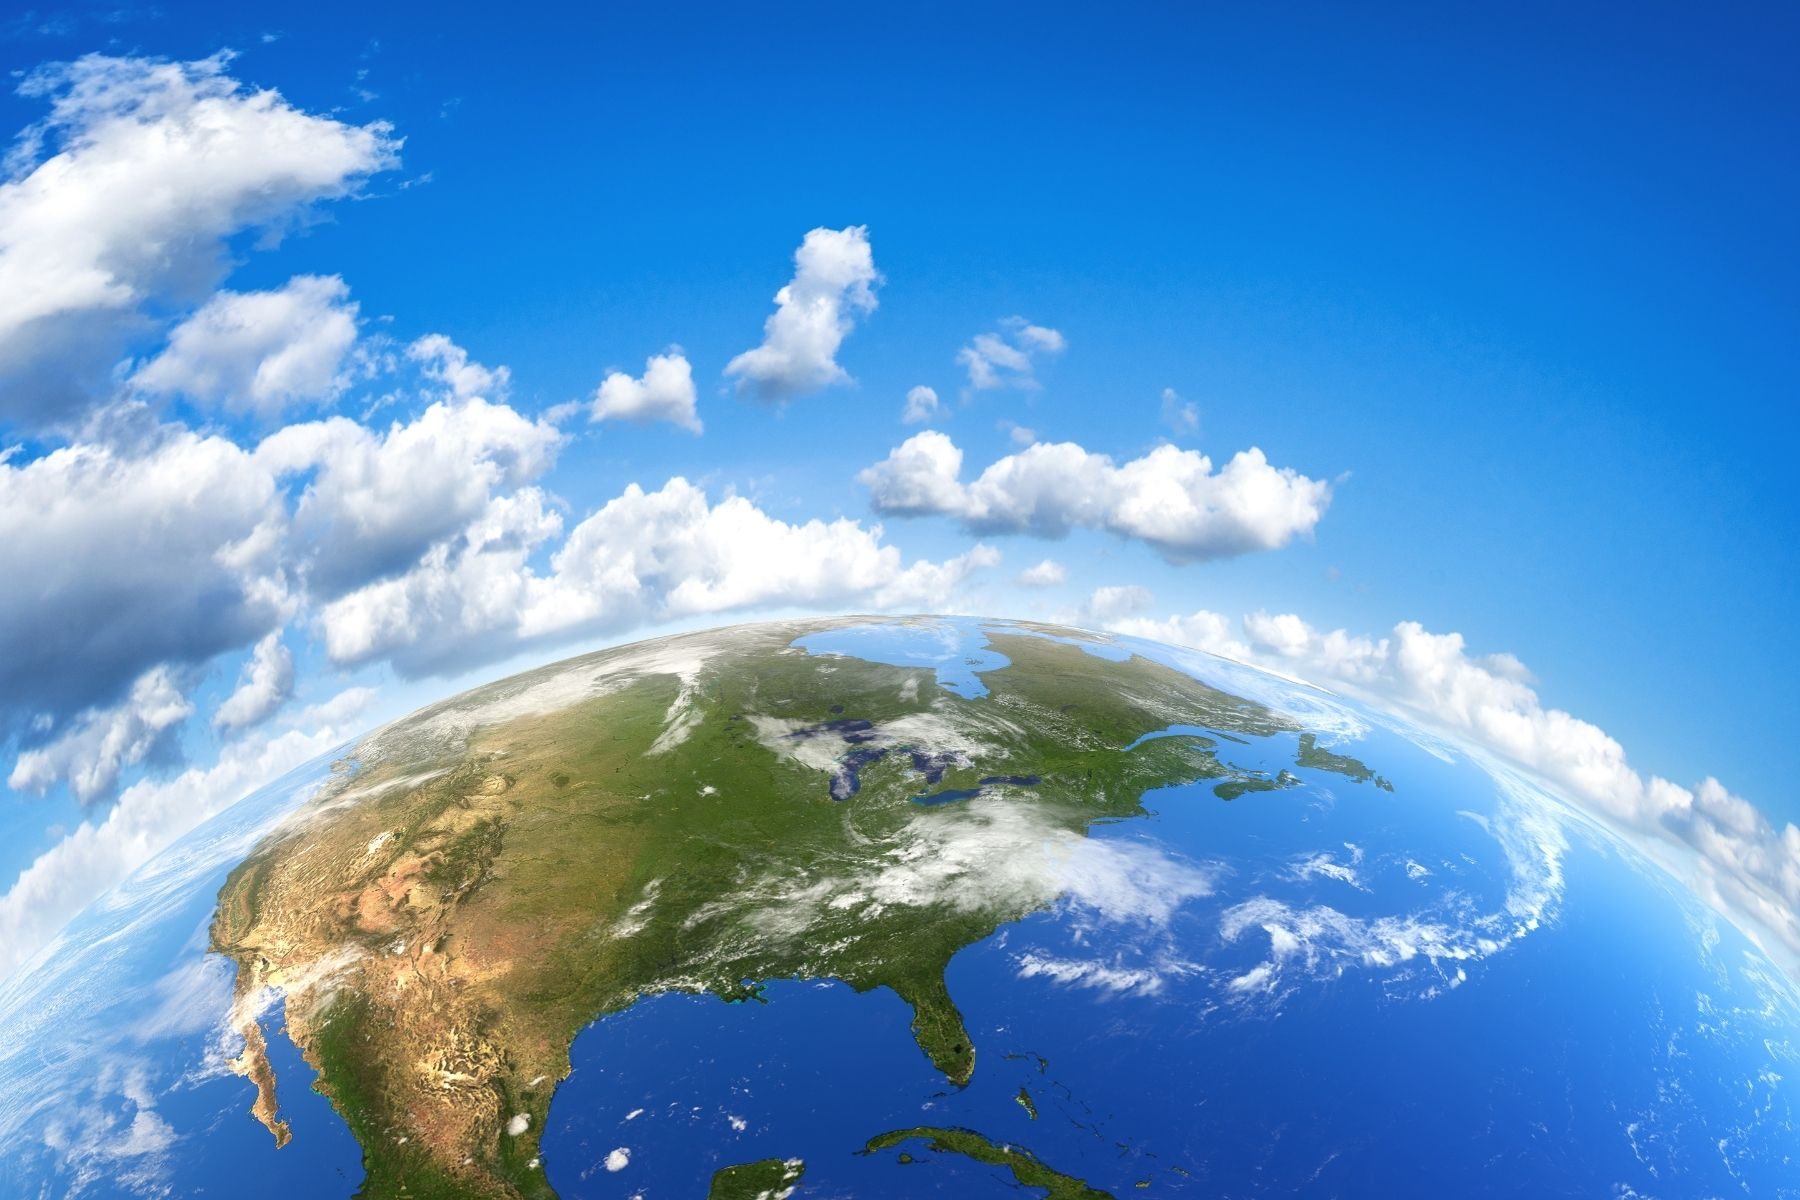

A changing climate is leading to more occurrences of extreme events such as droughts (moisture deficits) and floods (moisture surpluses), which have a negative impact on crop growth and yields. Plants require an optimum soil-water-air environment in the root zone to maintain physiological response to growth, photosynthetic functions, and productive vegetative capacity for high yield response.

Rising air temperatures also have a deleterious effect on crop production, as heat stress limits the optimum productive capability of our current commercial plant species on which the population depends for food security.

A changing climate is also affecting other aspects of crop production such as increased pests and disease in some situations, changes and even losses in biodiversity in some environments, and major disruptions due to extreme storm events, such as the recent decimation by Hurricane Maria of Puerto Rico’s agricultural crops, livestock, and associated infrastructure.

**Problem Statement**

Twitter being one of the most influential ways of passing information and analysing trends on various issues and in our case climate change, we chose to analyse tweets data to predict whether a tweet is pro-climate change, anti-climate change , from a news segment or just a neutral part with not take in climate change issues.

**Metric for success**

Implementing a model that can accurately predict whether a tweet lies in the following categories of sentiments:

1. Pro
2. Anti
3. News
4. Neutral

These categories are all in relation to climate change.

**Context**

The dataset in its entirity is an extract from twitter and involves the message of climate change. In recent times there has been alot of talk aroud climate change and preseving our climate.

**Data Relevance**

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo.

This dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were annotated. Each tweet is labelled independently by 3 reviewers. This dataset only contains tweets that all 3 reviewers agreed on (the rest were discarded).

**Data Source**: [Kaggle](https://www.kaggle.com/datasets/edqian/twitter-climate-change-sentiment-dataset)

**DataSet description**

Each tweet is labelled as one of the following classes:

2(News): the tweet links to factual news about climate change
1(Pro): the tweet supports the belief of man-made climate change
0(Neutral): the tweet neither supports nor refutes the belief of man-made climate change
1(Anti): the tweet does not believe in man-made climate change


# **ANALYSING DATA TO UNDERSTAND**



Importing data manipulation libraries

In [ ]:
#Importing data manipulation libraries

from __future__ import absolute_import,division,print_function,unicode_literals
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string

#Text preprocessing libraries
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import datetime
import tensorflow_hub as hub


Loading the dataset into the notebook and proceeding to visualize the first 5 rows of the dataset

In [ ]:
#Loading and previewing the data
data = pd.read_csv('/content/twitter_sentiment_data.csv')

data

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153
...,...,...,...
43938,1,"Dear @realDonaldTrump,\nYeah right. Human Medi...",791307031919550464
43939,1,What will your respective parties do to preven...,791316857403936768
43940,2,RT @MikkiL: UN Poll Shows Climate Change Is th...,791357509101621249
43941,0,RT @taehbeingextra: i still can$q$t believe th...,791390042136641537


Finding out the shape of the dataset

In [ ]:
data.shape

(43943, 3)

The dataset contains 43943 rows and 3 columns

The rows represent tweets and each tweet has 3 features

Checking data types per column

In [ ]:
data.dtypes

sentiment     int64
message      object
tweetid       int64
dtype: object

The sentiment and tweetid columns are of int type, while message is a string, however tweeetid should be converted to string wheres sentiment should be categorical

Getting overview of the data

In [ ]:
data.describe()

,sentiment,tweetid
count,43943.000000,4.394300e+04
mean,0.853924,8.367966e+17
std,0.853543,8.568506e+16
min,-1.000000,5.926334e+17
25%,0.000000,7.970376e+17
50%,1.000000,8.402301e+17
75%,1.000000,9.020003e+17
max,2.000000,9.667024e+17


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43943 entries, 0 to 43942
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  43943 non-null  int64 
 1   message    43943 non-null  object
 2   tweetid    43943 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


Searching for null/missing columns

In [ ]:
data.isnull().values.any()
#Returns false meaning there are no missing values/null values

False

There are no missing/null values in the dataset

Checking for duplicate entries in the data

In [ ]:
data. duplicated(). sum()

0

There are no duplicates

Checking column titles

In [ ]:
data.columns

Index(['sentiment', 'message', 'tweetid'], dtype='object')

As stated earlier, there are 3 columns namely:

sentiment

*   Sentiment
*   message
*   tweetid

Dropping the tweetid column and previewing the changes have been effected.

In [ ]:
data.drop('tweetid', axis=1, inplace=True)
data.head(10)

,sentiment,message
0,-1,@tiniebeany climate change is an interesting h...
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...
3,1,RT @Mick_Fanning: Just watched this amazing do...
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ..."
5,0,Unamshow awache kujinga na iko global warming ...
6,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ..."
7,2,RT @CCIRiviera: Presidential Candidate #Donald...
8,0,RT @AmericanIndian8: Leonardo DiCaprio's clima...
9,1,#BeforeTheFlood Watch #BeforeTheFlood right he...


In [ ]:
data. duplicated(). sum()

2902

In [ ]:
#checking the duplicated rows
duplicate_rows = data[data.duplicated()]
duplicate_rows

,sentiment,message
6,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ..."
12,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...
19,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...
26,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...
29,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...
...,...,...
40535,1,RT @antiarzE: - do u like green eggs &amp; ham...
42668,0,RT @exostext: Bbh: boys are hot\nBbh: girls ar...
42697,-1,RT @realDonaldTrump: The global warming we sho...
43132,1,RT @ClimateReality: We can’t fight climate cha...


In [ ]:
#dropping duplicates
data.drop_duplicates()

,sentiment,message
0,-1,@tiniebeany climate change is an interesting h...
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...
3,1,RT @Mick_Fanning: Just watched this amazing do...
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ..."
...,...,...
43938,1,"Dear @realDonaldTrump,\nYeah right. Human Medi..."
43939,1,What will your respective parties do to preven...
43940,2,RT @MikkiL: UN Poll Shows Climate Change Is th...
43941,0,RT @taehbeingextra: i still can$q$t believe th...


# **EXPLORATORY DATA ANALYSIS**

Converting the sentiment column to names in the categories

In [ ]:
sentiment_num2name = {
    -1: "Anti",
     0: "Neutral",
     1: "Pro",
     2: "News",
}
data["sentiment"] = data["sentiment"].apply(lambda num: sentiment_num2name[num])
data.head()

,sentiment,message
0,Anti,@tiniebeany climate change is an interesting h...
1,Pro,RT @NatGeoChannel: Watch #BeforeTheFlood right...
2,Pro,Fabulous! Leonardo #DiCaprio's film on #climat...
3,Pro,RT @Mick_Fanning: Just watched this amazing do...
4,News,"RT @cnalive: Pranita Biswasi, a Lutheran from ..."


Investigating the distribution of Sentiments from -1 to 2

In [ ]:
#Checking the class distribution
data['sentiment'].value_counts()

Pro        22962
News        9276
Neutral     7715
Anti        3990
Name: sentiment, dtype: int64

From the result above, the categories are as follows:
*   2 = 9276 tweets
*   1 = 22962 tweets
*   0 = 7715 tweets
*   -1 = 3990 tweets

Visualizing the sentiments distribution

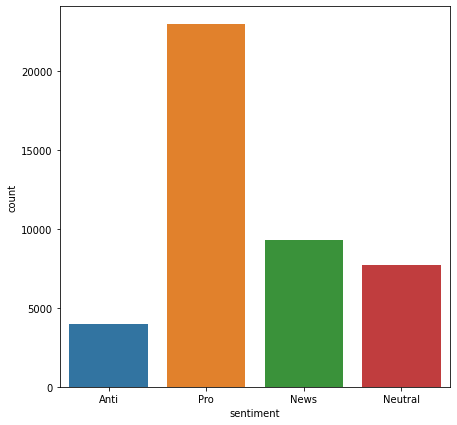

In [ ]:
fig = plt.figure(figsize=(7,7))
sns.countplot(x='sentiment', data = data)

In [ ]:
temp = data.groupby('sentiment').count()['message'].reset_index().sort_values(by='message',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,message
3,Pro,22962
2,News,9276
1,Neutral,7715
0,Anti,3990


In [ ]:
#grapgical presentation of tweet in funnel form
from plotly import graph_objs as go

fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.message,
    title = {"position": "top center", "text": "Funnel-Chart of Twitter Sentiment Distribution on Climate change"}
    ))
fig.show()

Conclusively, from the visualizations above, it is clear that Category 1 contains the highest number of tweets which suggests that most tweets are pro- climate change. This is closely followed by category 2, tweets which are new or from news outlets and taking the last category, -1, are tweets which are anti-climate change

Investigating the number of characters, words in the tweets

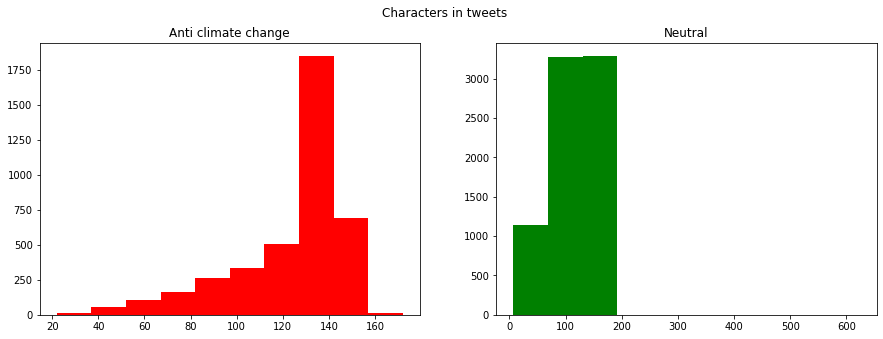

In [ ]:
#EDA
#Number of characters in tweet
fig,(ax1,ax2)=plt.subplots(1,2, figsize=(15,5))
tweet_len=data[data['sentiment']=='Anti']['message'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('Anti climate change')
tweet_len=data[data['sentiment']=='Neutral']['message'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Neutral')
fig.suptitle('Characters in tweets')
plt.show()

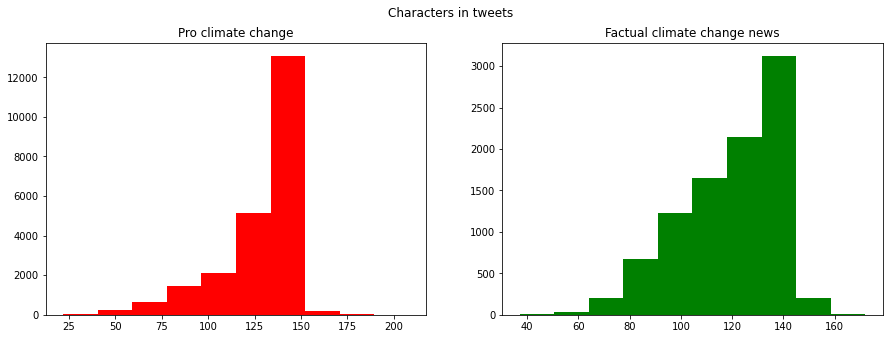

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2, figsize=(15,5))
tweet_len=data[data['sentiment']=='Pro']['message'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('Pro climate change')
tweet_len=data[data['sentiment']=='News']['message'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Factual climate change news')
fig.suptitle('Characters in tweets')
plt.show()

From the visualizations above, the characters in a tweet range from 0 to about 180 for anti-climate change, while those of neutral tweets range between 0 and about 180 characters, pro-climate change tweets have about 0 to 180 characters while those of factual climate change news range from 0 to just above 180 characters

 Investigating words in tweets

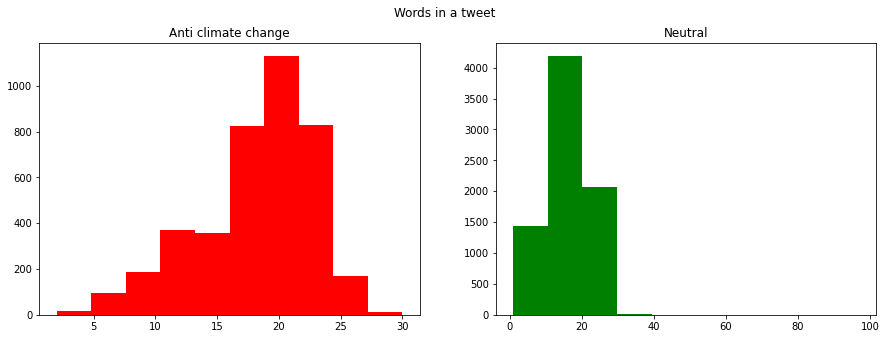

In [ ]:
#Words in tweets

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
tweet_len=data[data['sentiment']=='Anti']['message'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('Anti climate change')
tweet_len=data[data['sentiment']=='Neutral']['message'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Neutral')
fig.suptitle('Words in a tweet')
plt.show()

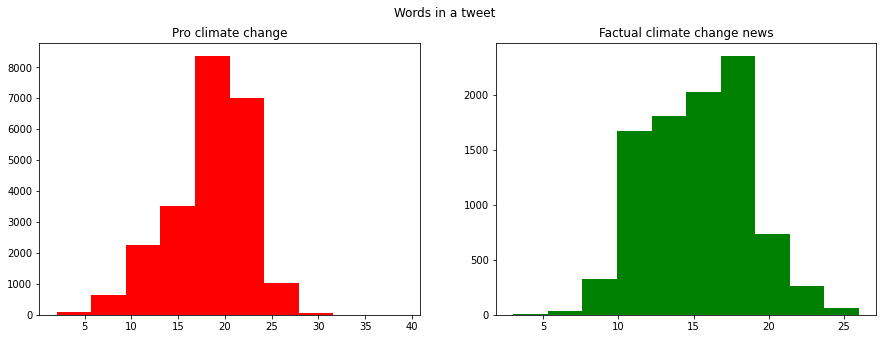

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
tweet_len=data[data['sentiment']=='Pro']['message'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('Pro climate change')
tweet_len=data[data['sentiment']=='News']['message'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Factual climate change news')
fig.suptitle('Words in a tweet')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0.98, 'Average word length in each tweet')

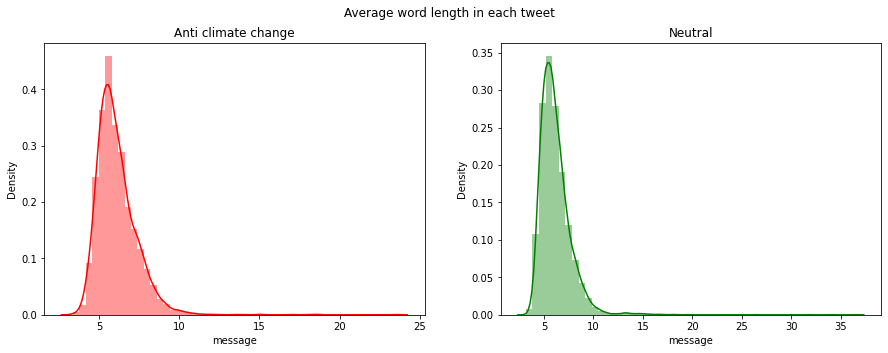

In [ ]:
#Average word length
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
word=data[data['sentiment']=='Anti']['message'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Anti climate change')
word=data[data['sentiment']=='Neutral']['message'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Neutral')
fig.suptitle('Average word length in each tweet')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



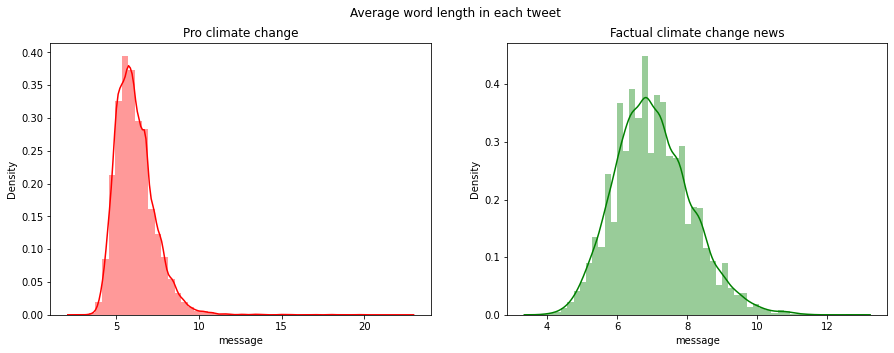

In [ ]:
#Average word length
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
word=data[data['sentiment']=='Pro']['message'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Pro climate change')
word=data[data['sentiment']=='News']['message'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Factual climate change news')
fig.suptitle('Average word length in each tweet');

Tweet hashtag summary

Since Twitter uses Hashtags almost like a summarization feature (at least in the sense of highlighting core ideas). We look at some of top hashtags for each of the classes of sentiment. We'll then make "word clouds" to visualize their prominence.

In [ ]:
#importing necessary libraries
import re
import nltk
import itertools

In [ ]:
from IPython.display import (
    Markdown as md,
    Latex,
    HTML,
)
from tqdm.auto import tqdm

In [ ]:
top15 = {}

by_sentiment = data.groupby("sentiment")
for sentiment, group in tqdm(by_sentiment):
    hashtags = group["message"].apply(lambda tweet: re.findall(r"#(\w+)", tweet))
    hashtags = itertools.chain(*hashtags)
    hashtags = [ht.lower() for ht in hashtags]
    
    frequency = nltk.FreqDist(hashtags)
    
    df_hashtags = pd.DataFrame({
        "hashtags": list(frequency.keys()),
        "counts": list(frequency.values()),
    })
    top15_htags = df_hashtags.nlargest(15, columns=["counts"])
    
    top15[sentiment] = top15_htags.reset_index(drop=True)

display(pd.concat(top15, axis=1).head(n=10))

  0%|          | 0/4 [00:00<?, ?it/s]

Anti               Neutral                  News         \
        hashtags counts       hashtags counts       hashtags counts   
0           tcot     59        climate     59        climate    330   
1           maga     31  climatechange     51  climatechange    171   
2        climate     25          trump     20           news     80   
3  climatechange     25  globalwarming     18    environment     77   
4          pjnet     23    debatenight     16          trump     49   
5          trump     21          cop21     14        science     42   
6  globalwarming     19         auspol     13  globalwarming     29   
7       fakenews     15          cop22     11          cop22     26   
8             p2     13        science      9             p2     22   
9       teaparty     11           maga      9          cop21     21   

               Pro         
          hashtags counts  
0          climate    541  
1    climatechange    384  
2   beforetheflood    265  
3     actonclimate    156  
4   parisagreement    108  
5  imvotingbecause     93  
6            cop22     86  
7           auspol     76  
8            cop21     73  
9    globalwarming     73

Visualizing the frequency of hashtags in barplots for each sentiment categorization

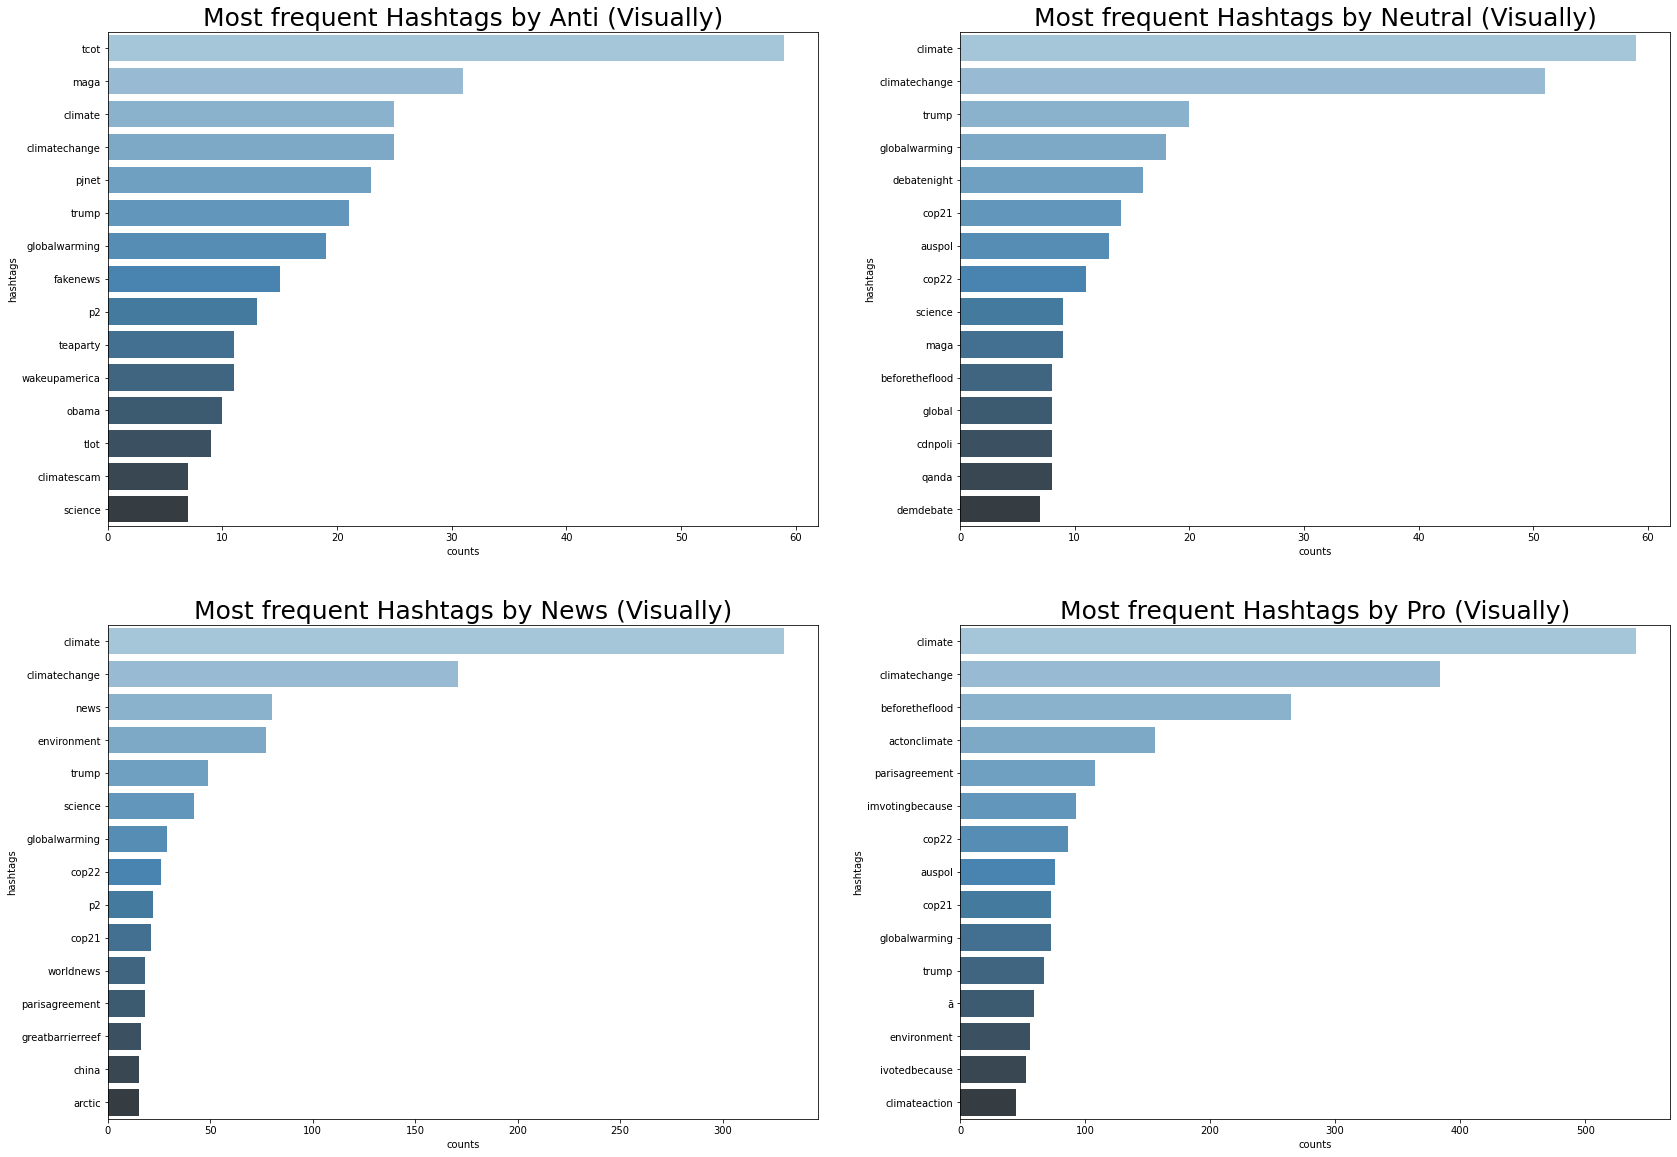

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(28, 20))
counter = 0

for sentiment, top in top15.items():
    sns.barplot(data=top, y="hashtags", x="counts", palette="Blues_d", ax=axes[counter // 2, counter % 2])
    axes[counter // 2, counter % 2].set_title(f"Most frequent Hashtags by {sentiment} (Visually)", fontsize=25)
    counter += 1
plt.show()

**Observations:**

1. The most popular hashtags are, broadly, climate and climatechange. Which is expected, given the topic; but also, among the top 3 are relating to trump and his campaign slogan maga.

2. The BeforeTheFlood hashtag refers to a 2016 documentary where Leonardo DiCaprio met with scientists, activists, and word leaders to discuss the dangers of climate and and possible solutions.

3. COP22, ParisAgreement, and Trump in the Pro sentiment are likely related to the formal process Trump's administrastion began to exit the Paris Agreements, where north of 200 nations pledged to reduce greenhour gas emissions, assist developing nations, and assist [poor] nations struggling with the consequences of a warming Earth.

4. Interestingly, auspol (short for Australian Politics) made the shortlist of the Pro sentiment. This is likeyl attributed to an assessment published quantifying the role of climate change in Australian brushfires and their increaseed risk of occuring.

# **CLEANING TWEET DATA**

**Tweet Data Cleaning**

In [ ]:
#Data pre-processing
#Glance at data
data['message'][:20]

0     @tiniebeany climate change is an interesting h...
1     RT @NatGeoChannel: Watch #BeforeTheFlood right...
2     Fabulous! Leonardo #DiCaprio's film on #climat...
3     RT @Mick_Fanning: Just watched this amazing do...
4     RT @cnalive: Pranita Biswasi, a Lutheran from ...
5     Unamshow awache kujinga na iko global warming ...
6     RT @cnalive: Pranita Biswasi, a Lutheran from ...
7     RT @CCIRiviera: Presidential Candidate #Donald...
8     RT @AmericanIndian8: Leonardo DiCaprio's clima...
9     #BeforeTheFlood Watch #BeforeTheFlood right he...
10    RT @DrDeJarnett: It's vital that the public he...
11    Bangladesh did not cause climate change, so th...
12    RT @NatGeoChannel: Watch #BeforeTheFlood right...
13    Now's the time: we need a strong #FTT that wor...
14    RT @WorldResources: Reflections on Leonardo Di...
15    RT @littoralsociety: The problem with global w...
16    RT @NatGeoChannel: One of the easiest ways to ...
17    RT @esquire: Watch Leo DiCaprio's climate 

defining the cleaning function to remove specified elements from the tweet message

In [ ]:
#Define a function

import re

def text_cleaning(message):
  
    message = message.lower()                           #Lowercase
    message = re.sub(r'http\S+|www\.\S+|https\S+', '', message, flags=re.MULTILINE) #Removing the hyperlink/urls
    message = re.sub(r'\@\w+|\#','', message)     # removing @mentions and #
    message = re.sub(r'rt[\s]+', '', message)           # removing RT
    message = re.sub(r'&[a-z;]+', '', message)          # removing '>'
    message = re.sub('[^a-zA-Z]', ' ', message)         #removing punctuation

    return message

Applying cleaning function and previewing changes

In [ ]:
# applying the text cleaning function on tweets
data['message'] = data['message'].apply(text_cleaning)
data.head(100)

,sentiment,message
0,Anti,climate change is an interesting hustle as it...
1,Pro,watch beforetheflood right here as travels...
2,Pro,fabulous leonardo dicaprio s film on climate ...
3,Pro,just watched this amazing documentary by leo...
4,News,pranita biswasi a lutheran from odisha giv...
...,...,...
95,News,alberta tories are losing a big issue they ve ...
96,Pro,if you don t believe in global warming come ...
97,Pro,we just entered an alarming new era of glo...
98,Pro,global warming real as hell al gore told us...


Lemmatization and removing stopwords

Importing necessary libraries

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet

Creating a lemmatizing function combined with a stopword identifier

In [ ]:
def lemmatizer(data):
    data["length"] = data["message"].str.len()
    data["tokenized"] = data["message"].apply(word_tokenize)
    data["parts-of-speech"] = data["tokenized"].apply(nltk.tag.pos_tag)
    
    def str2wordnet(tag):
        conversion = {"J": wordnet.ADJ, "V": wordnet.VERB, "N": wordnet.NOUN, "R": wordnet.ADV}
        try:
            return conversion[tag[0].upper()]
        except KeyError:
            return wordnet.NOUN
    
    wnl = WordNetLemmatizer()
    data["parts-of-speech"] = data["parts-of-speech"].apply(
        lambda tokens: [(word, str2wordnet(tag)) for word, tag in tokens]
    )
    data["lemmatized"] = data["parts-of-speech"].apply(
        lambda tokens: [wnl.lemmatize(word, tag) for word, tag in tokens]
    )
    data["lemmatized"] = data["lemmatized"].apply(lambda tokens: " ".join(map(str, tokens)))
    
    return data

Downloading requisite packages for the nltk library

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Applying the lemmatizer function to our dataset and previewing the changes

In [ ]:
data = lemmatizer(data)
data.head()

,sentiment,message,length,tokenized,parts-of-speech,lemmatized
0,Anti,climate change is an interesting hustle as it...,126,"[climate, change, is, an, interesting, hustle,...","[(climate, n), (change, n), (is, v), (an, n), ...",climate change be an interesting hustle a it b...
1,Pro,watch beforetheflood right here as travels...,93,"[watch, beforetheflood, right, here, as, trave...","[(watch, n), (beforetheflood, n), (right, r), ...",watch beforetheflood right here a travel the w...
2,Pro,fabulous leonardo dicaprio s film on climate ...,84,"[fabulous, leonardo, dicaprio, s, film, on, cl...","[(fabulous, a), (leonardo, n), (dicaprio, n), ...",fabulous leonardo dicaprio s film on climate c...
3,Pro,just watched this amazing documentary by leo...,104,"[just, watched, this, amazing, documentary, by...","[(just, r), (watched, v), (this, n), (amazing,...",just watch this amazing documentary by leonard...
4,News,pranita biswasi a lutheran from odisha giv...,123,"[pranita, biswasi, a, lutheran, from, odisha, ...","[(pranita, a), (biswasi, n), (a, n), (lutheran...",pranita biswasi a lutheran from odisha give te...


Identifying the frequent words/Buzzwords

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

Calculating the frequency of words for each sentiment

In [ ]:
frequency = {}

by_sentiment = data.groupby("sentiment")
for sentiment, group in tqdm(by_sentiment):
    cv = CountVectorizer(stop_words="english")
    words = cv.fit_transform(group["lemmatized"])
    
    n_words = words.sum(axis=0)
    word_freq = [(word, n_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
    
    freq = pd.DataFrame(word_freq, columns=["word", "freq"])
    
    frequency[sentiment] = freq.head(n=25)

to_view = pd.concat(frequency, axis=1).head(n=25)
display(to_view)

  0%|          | 0/4 [00:00<?, ?it/s]

Anti        Neutral             News              Pro       
         word  freq     word  freq       word  freq       word   freq
0     climate  2402  climate  4652    climate  8433    climate  19827
1      change  2312   change  4621     change  8241     change  19521
2      global  1974   global  3245      trump  2086     global   4296
3     warming  1480  warming  2602     global  1418    warming   3169
4        warm   453     warm   595    warming   940      trump   2369
5        make   351      say   517        say   902    believe   2159
6         say   226    trump   492        new   577      think   1623
7         man   222    cause   331  scientist   566      doesn   1434
8       cause   220     like   330        epa   560       real   1309
9        just   208    think   327      fight   479      world   1199
10       year   202     real   295      study   416     people   1149
11      obama   196     just   291      world   377        say   1141
12    science   196  believe   285       news   367      fight   1114
13  scientist   189     make   272      obama   345       make    976
14       hoax   186      don   234      china   337       just    937
15      trump   178     talk   227      paris   315        don    930
16    believe   176   people   205       warm   311       warm    868
17       real   168     know   191       plan   288     denier    838
18     people   168      new   165     donald   281       need    834
19    liberal   161    world   163     pruitt   260       like    805
20    weather   145     tell   161     energy   242  president    781
21       fake   142    thing   156      cause   239        die    750
22       like   138     need   156  president   235       deny    733
23      think   135  penguin   155    science   233        new    732
24       scam   135     year   150      scott   227      cause    678

Building a wordcloud visualizer for each word frequency in the sentiments

  0%|          | 0/4 [00:00<?, ?it/s]

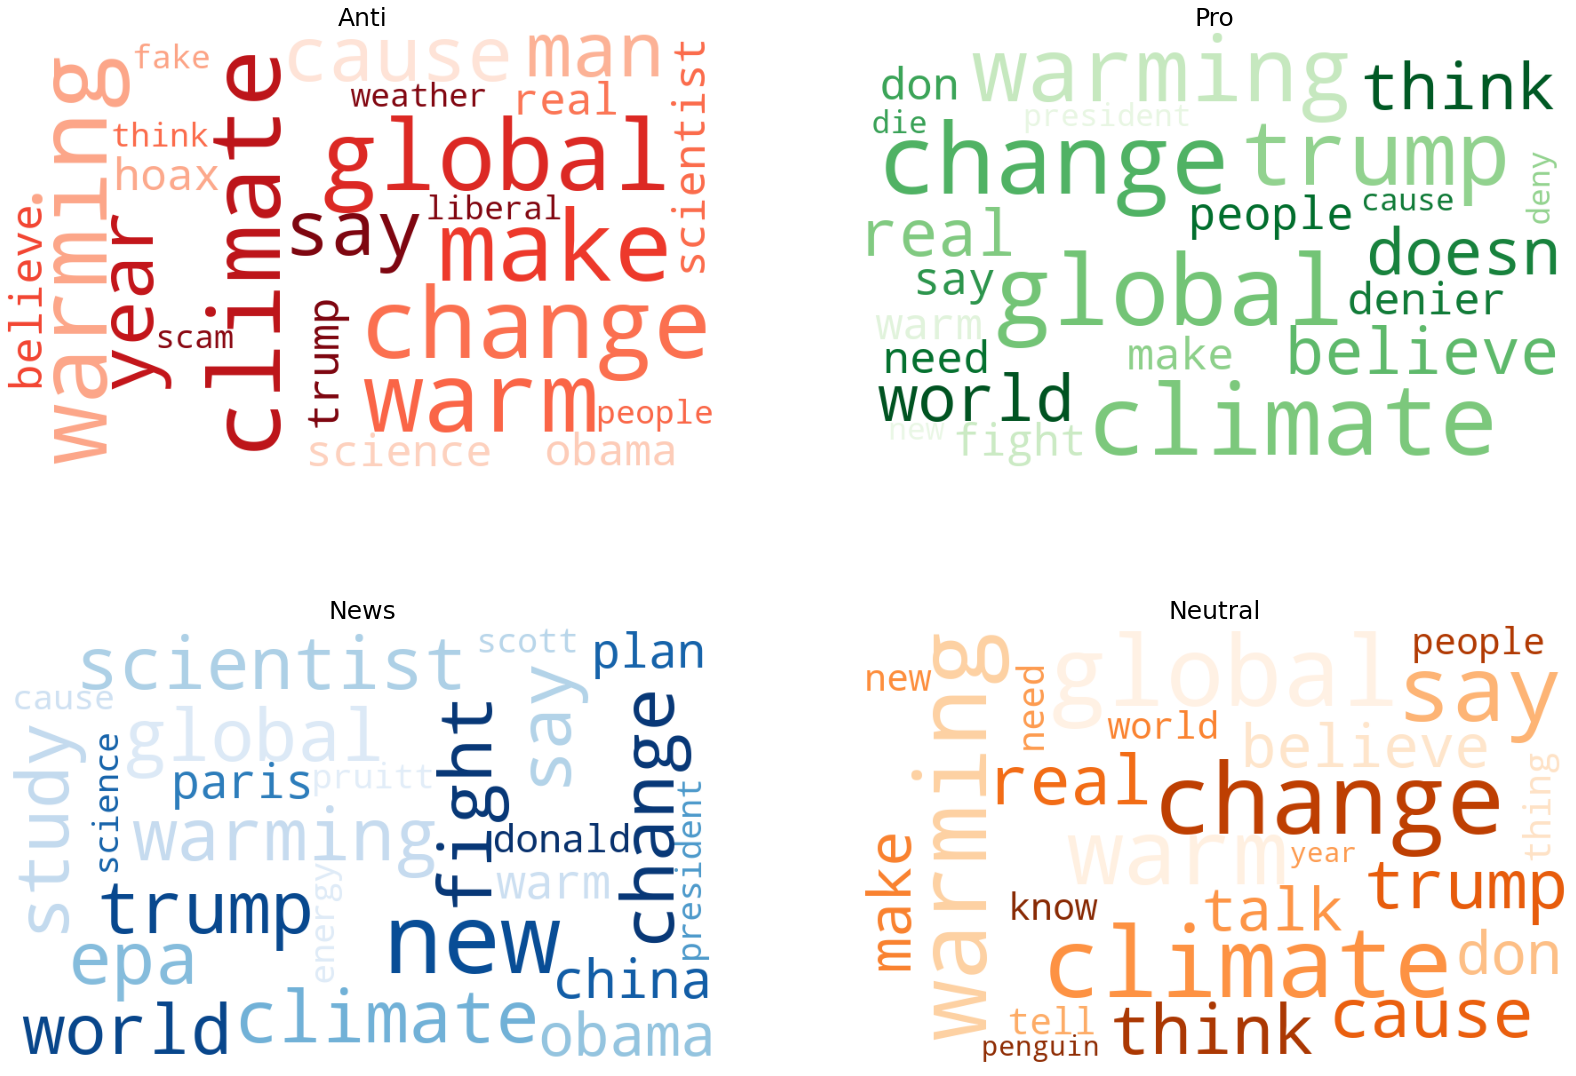

In [ ]:
words = {sentiment: " ".join(frequency[sentiment]["word"].values) for sentiment in sentiment_num2name.values()}
cmaps = {
    "Anti": ("Reds", 110),
    "Pro" : ("Greens", 73),
    "News": ("Blues", 0),
    "Neutral": ("Oranges", 10),
}

from wordcloud import WordCloud

wordclouds = {}
for sentiment, (cmap, rand) in tqdm(cmaps.items()):
    wordclouds[sentiment] = WordCloud(
        width=800, height=500, random_state=rand,
        max_font_size=110, background_color="white",
        colormap=cmap
    ).generate(words[sentiment])
    
fig, axes = plt.subplots(2, 2, figsize=(28, 20))
counter = 0

for sentiment, wordcloud in wordclouds.items():
    axes[counter // 2, counter % 2].imshow(wordcloud)
    axes[counter // 2, counter % 2].set_title(sentiment, fontsize=25)
    counter += 1
    
for ax in fig.axes:
    plt.sca(ax)
    plt.axis("off")

plt.show()

**Observations:**

1. The top 3 buzzwords are climate, change, and global . This seems to indicate that a lot of the same information is being shared/viewed – this applies across all sentiments. While we can't conclude that's a result of the "filter bubble", it certainly seems like that might be a latent (hidden) cause.

2. Interestingly, trump occurs across all cases. This may not be surprising given his presidency during the timeframe the Tweets were recorded – this is something that likely warrants further investigation especially along the axes of Neutral and Pro.

3. Words like real, believe, think, and fight occur quite frequently in the Pro sentiment. Interestingly, both the Pro and Anti sentiment seem to be saying science and scientist, which seems indicative that both sides believe their quoting accurate, reproduced, research.

4. Take a look at the table above, you'll see the http actually shows up in the Pro sentiment quite frequently. This would imply that links are being shared alongside the Tweets quite frequently. Contrast that with the other sentiments – particularly, News. Why might this be the case?